# Binary Classififcation Using Random Forest Classifier with Feature Engineering
## Objective - To Accurately predict the Target =1 using Random Forest Classifier
#### Target  variable= 'target'
#### Classes  = 0 & 1
#### 0 = customer not likely to buy a new car
#### 1 = customer likely to buy a new car 

###### Data Dictionary:
ID: Unique ID of the customer
target: Model target. 1 if the customer has purchased more than 1 vehicle, 0 if they have only purchased 1.
age_band: Age banded into categories
gender: Male, Female or Missing
car_model: The model of vehicle, 18 models in total
car_segment: The type of vehicle
age_of_vehicle_years: Age of their last vehicle, in deciles
sched_serv_warr: Number of scheduled services (e.g. regular check-ups) used under warranty, in deciles
non_sched_serv_warr: Number of non-scheduled services (e.g. something broke out of the service cycle) used under warranty, in deciles
sched_serv_paid: Amount paid for scheduled services, in deciles
non_sched_serv_paid: Amount paid for non scheduled services, in deciles
total_paid_services: Amount paid in total for services, in deciles
total_services: Total number of services, in deciles
mth_since_last_serv: The number of months since the last service, in deciles
annualised_mileage: Annualised vehicle mileage, in deciles
num_dealers_visited: Number of different dealers visited for servicing, in deciles
num_serv_dealer_purchased: Number of services had at the same dealer where the vehicle was purchased, in deciles
### Project Steps:
##### 1. Loading and exploring data
##### 2. Preparing and cleaning data
##### 3. Splitting the data in Train (60%), Validation (20%) and Test (20%) sets
##### 4. Fitting the Random Forest Classifier
##### 5. Assess Baseline Performance
##### 6. Assess the performance metrics on Validation and Test sets

### 1. Loading and exploring the data

In [2]:
import pandas as pd
import numpy as np
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, classification_report


In [3]:
data = pd.read_csv('/Users/varunsinghchhetri/Downloads/repurchase_training.csv')
df = pd.DataFrame(data)

In [4]:
df.head()

,ID,Target,age_band,gender,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
0,1,0,3. 35 to 44,Male,model_1,LCV,9,2,10,3,7,5,6,9,8,10,4
1,2,0,NaN,NaN,model_2,Small/Medium,6,10,3,10,4,9,10,6,10,7,10
2,3,0,NaN,Male,model_3,Large/SUV,9,10,9,10,9,10,10,7,10,6,10
3,5,0,NaN,NaN,model_3,Large/SUV,5,8,5,8,4,5,6,4,10,9,7
4,6,0,NaN,Female,model_2,Small/Medium,8,9,4,10,7,9,8,5,4,4,9


In [5]:
df.describe()

,ID,Target,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
count,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000
mean,77097.384180,0.026809,5.493022,5.452500,5.472517,5.452287,5.497050,5.481692,5.454967,5.469807,5.502836,5.485438,5.480778
std,44501.636704,0.161525,2.843299,2.884328,2.870665,2.886528,2.878699,2.880408,2.875961,2.859756,2.854896,2.876772,2.867524
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,38563.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,77132.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,115668.000000,0.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,154139.000000,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [6]:
df.shape

(131337, 17)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131337 entries, 0 to 131336
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   ID                         131337 non-null  int64 
 1   Target                     131337 non-null  int64 
 2   age_band                   18962 non-null   object
 3   gender                     62029 non-null   object
 4   car_model                  131337 non-null  object
 5   car_segment                131337 non-null  object
 6   age_of_vehicle_years       131337 non-null  int64 
 7   sched_serv_warr            131337 non-null  int64 
 8   non_sched_serv_warr        131337 non-null  int64 
 9   sched_serv_paid            131337 non-null  int64 
 10  non_sched_serv_paid        131337 non-null  int64 
 11  total_paid_services        131337 non-null  int64 
 12  total_services             131337 non-null  int64 
 13  mth_since_last_serv        131337 non-null  

In [8]:
df.isnull().sum()

ID                                0
Target                            0
age_band                     112375
gender                        69308
car_model                         0
car_segment                       0
age_of_vehicle_years              0
sched_serv_warr                   0
non_sched_serv_warr               0
sched_serv_paid                   0
non_sched_serv_paid               0
total_paid_services               0
total_services                    0
mth_since_last_serv               0
annualised_mileage                0
num_dealers_visited               0
num_serv_dealer_purchased         0
dtype: int64

### 2. Preparing and cleaning the data

In [9]:
df['Target'].value_counts()

0    127816
1      3521
Name: Target, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

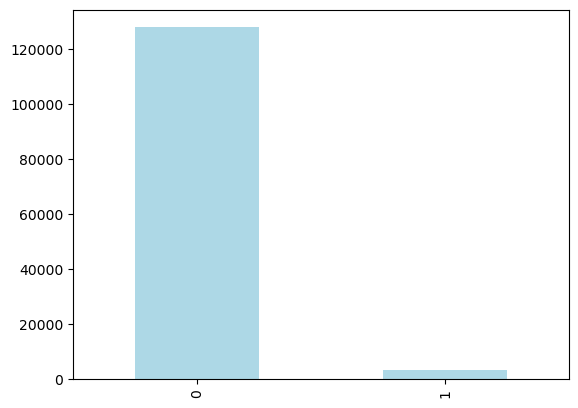

In [43]:
df['Target'].value_counts().plot(kind='bar', color='LightBlue')
plt.show

In [11]:
# Check for duplicates
duplicates = df.duplicated()

# Print number of duplicates
print(f"Number of duplicates: {duplicates.sum()}")

Number of duplicates: 0


In [12]:
# Dropping the columns based on the least important features
df_copy = df.drop(['ID','age_band', 'car_segment', 'car_model'], axis=1)

In [13]:
# Checking for missing values
df_copy.isnull().sum()

Target                           0
gender                       69308
age_of_vehicle_years             0
sched_serv_warr                  0
non_sched_serv_warr              0
sched_serv_paid                  0
non_sched_serv_paid              0
total_paid_services              0
total_services                   0
mth_since_last_serv              0
annualised_mileage               0
num_dealers_visited              0
num_serv_dealer_purchased        0
dtype: int64

In [14]:
df_copy['gender'].value_counts()

Male      36072
Female    25957
Name: gender, dtype: int64

In [15]:
df_copy['gender'] = df_copy['gender'].fillna('unknown')

In [16]:
df_copy.isnull().sum()

Target                       0
gender                       0
age_of_vehicle_years         0
sched_serv_warr              0
non_sched_serv_warr          0
sched_serv_paid              0
non_sched_serv_paid          0
total_paid_services          0
total_services               0
mth_since_last_serv          0
annualised_mileage           0
num_dealers_visited          0
num_serv_dealer_purchased    0
dtype: int64

In [17]:
# Performing One Hot Encoding
df_copy = pd.get_dummies(df_copy, columns=['gender'])

### Feature Engineering

In [18]:
# Mileage per service: Create a new feature by dividing the annualised_mileage by the total_services. 
# This will give an idea of how much mileage the vehicle covers per service.

df_copy['mil_per_sev'] = df_copy['annualised_mileage'] / df_copy['total_services']

In [19]:
# Warranty utilization: Create a new feature by adding the sched_serv_warr and non_sched_serv_warr columns.
#This will give an idea of how much the customer has utilized their warranty.

df_copy['war_utz'] = df_copy['sched_serv_warr'] + df_copy['non_sched_serv_warr']

In [20]:
# Dealership loyalty: Creating a new feature by dividing the num_serv_dealer_purchased by the num_dealers_visited.
# This will give  an idea of how loyal the customer is to their dealership.

df_copy['dealer_loyal'] = df_copy['num_serv_dealer_purchased'] / df_copy['num_dealers_visited']

In [21]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131337 entries, 0 to 131336
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Target                     131337 non-null  int64  
 1   age_of_vehicle_years       131337 non-null  int64  
 2   sched_serv_warr            131337 non-null  int64  
 3   non_sched_serv_warr        131337 non-null  int64  
 4   sched_serv_paid            131337 non-null  int64  
 5   non_sched_serv_paid        131337 non-null  int64  
 6   total_paid_services        131337 non-null  int64  
 7   total_services             131337 non-null  int64  
 8   mth_since_last_serv        131337 non-null  int64  
 9   annualised_mileage         131337 non-null  int64  
 10  num_dealers_visited        131337 non-null  int64  
 11  num_serv_dealer_purchased  131337 non-null  int64  
 12  gender_Female              131337 non-null  uint8  
 13  gender_Male                13

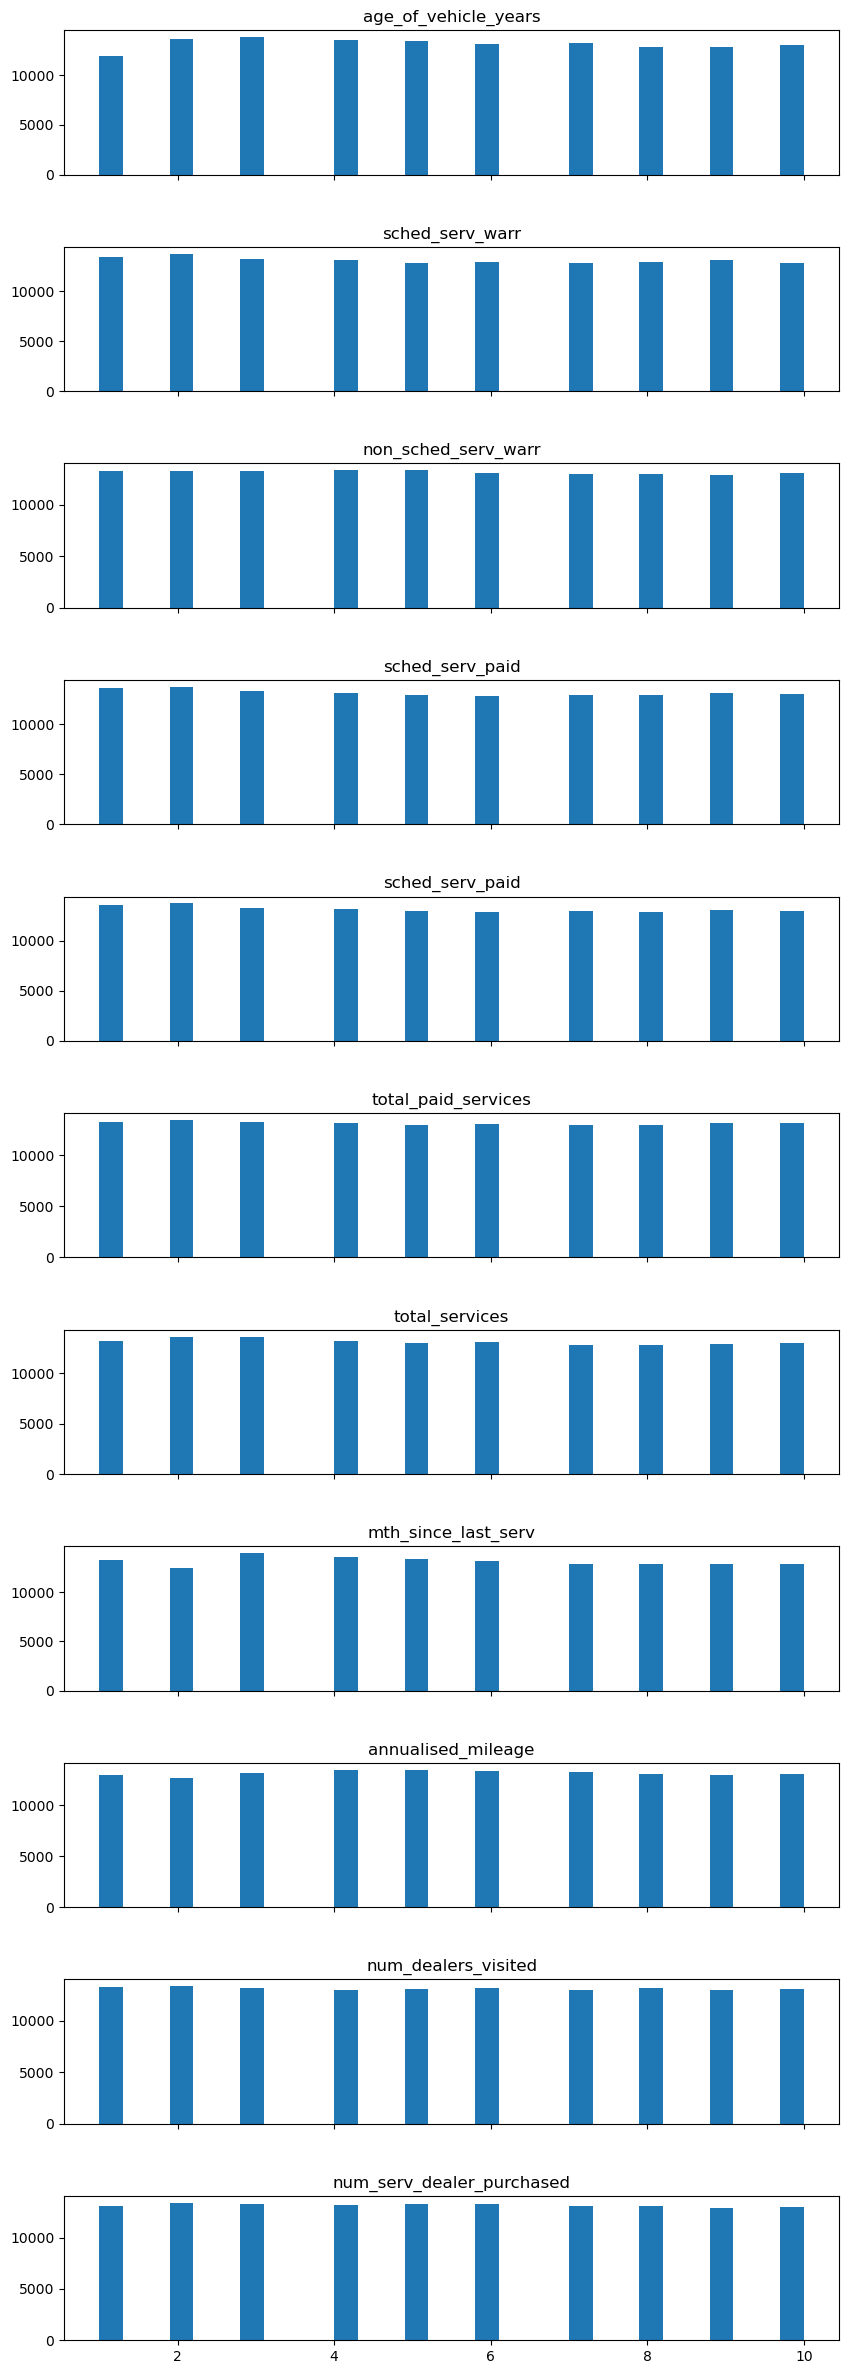

In [44]:
# Plotting histogram to check the distribution of columns

cols_to_check = ['age_of_vehicle_years', 'sched_serv_warr', 'non_sched_serv_warr', 'sched_serv_paid', 'sched_serv_paid', 'total_paid_services', 'total_services', 'mth_since_last_serv', 'annualised_mileage', 'num_dealers_visited', 'num_serv_dealer_purchased']

# Create subplots for each column
fig, axs = plt.subplots(nrows=len(cols_to_check), figsize=(10, 30), sharex=True)

# Plot histograms for each column
for i, col in enumerate(cols_to_check):
    axs[i].hist(df[col], bins=30)
    axs[i].set_title(col)

plt.subplots_adjust(hspace=0.5)
plt.show()

### 3. Splitting the dataset into Train (20%), Validation (20%) and Test (20%) sets

In [23]:
X = df_copy.drop('Target', axis=1) # features
y = df_copy['Target'] # target variable

# split into train, validation and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) 

# check the shape of the data
print('Train set:', X_train.shape, y_train.shape)
print('Validation set:', X_val.shape, y_val.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (78801, 17) (78801,)
Validation set: (26268, 17) (26268,)
Test set: (26268, 17) (26268,)


In [24]:
y_train.value_counts()

0    76645
1     2156
Name: Target, dtype: int64

In [25]:
y_val.value_counts()

0    25563
1      705
Name: Target, dtype: int64

In [26]:
y_test.value_counts()

0    25608
1      660
Name: Target, dtype: int64

### 4. Training the Random Forest Classifier and performing GridSearchCV

In [28]:
# Define the random forest classifier model and fit on the train data
rfc = RandomForestClassifier()


In [29]:
# Define the range of hyperparameters you want to search over using a parameter grid
# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'max_leaf_nodes': [None, 5, 10, 20],
    'bootstrap': [True, False],
}

In [30]:
# Create a GridSearchCV object and pass the classifier object, parameter grid, and evaluation metric to it
grid_search = GridSearchCV(
    estimator=rfc,
    param_grid=param_grid,
    scoring='f1',
    n_jobs=-1, # use all available CPU cores
    cv=5, # use 5-fold cross validation
    verbose=2 # show detailed logs
)


In [31]:

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 2592 candidates, totalling 12960 fits
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.9s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  14.5s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=  15.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=  15.3s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=  15.3s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, None],
                         'max_features': ['sqrt', 'log2'],
                         'max_leaf_nodes': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='f1', verbose=2)

In [32]:
# Use the best estimator returned by the GridSearchCV object to make predictions on the validation set
best_rfc = grid_search.best_estimator_
print(best_rfc)
y_val_pred = best_rfc.predict(X_val)
y_val_pred_prob = best_rfc.predict_proba(X_val)[:,1]

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=20,
                       max_features='log2', min_samples_split=5,
                       n_estimators=200)


### 6. Assessing the performance on validation set

In [33]:
# Evaluate the model's performance on the validation set using metrics such as accuracy, precision, recall, F1 score, and AUC-ROC
accuracy = best_rfc.score(X_val, y_val)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
auc_roc_val = roc_auc_score(y_val, y_val_pred_prob)

In [34]:
# Print evaluation metrics on validation data
print('Validation set evaluation metrics:')
print(f'Accuracy: {accuracy:.6f}')
print(f'Precision: {precision:.6f}')
print(f'Recall: {recall:.6f}')
print(f'F1 score: {f1:.6f}')
print(f'AUC-ROC score: {auc_roc_val:.6f}')

Validation set evaluation metrics:
Accuracy: 0.993947
Precision: 0.950495
Recall: 0.817021
F1 score: 0.878719
AUC-ROC score: 0.995871


### 6. Assessing the performance on test set

In [35]:

# Once you are satisfied with the model's performance on the validation set, use the best estimator to make predictions on the test set and evaluate its performance using the same metrics
y_test_pred = best_rfc.predict(X_test)
y_test_pred_prob = best_rfc.predict_proba(X_test)[:,1]
accuracy_test = best_rfc.score(X_test, y_test)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)
auc_roc_test = roc_auc_score(y_test, y_test_pred_prob)

In [36]:
# Print evaluation metrics on test data
print('\nTest set evaluation metrics:')
print(f'Accuracy: {accuracy_test:.6f}')
print(f'Precision: {precision_test:.6f}')
print(f'Recall: {recall_test:.6f}')
print(f'F1 score: {f1_test:.6f}')
print(f'AUC-ROC score: {auc_roc_test:.6f}')



Test set evaluation metrics:
Accuracy: 0.993262
Precision: 0.933573
Recall: 0.787879
F1 score: 0.854560
AUC-ROC score: 0.995373


In [37]:
# Create classification report for test data
class_report = classification_report(y_test, y_test_pred)
print('\nClassification report:')
print(class_report)


Classification report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     25608
           1       0.93      0.79      0.85       660

    accuracy                           0.99     26268
   macro avg       0.96      0.89      0.93     26268
weighted avg       0.99      0.99      0.99     26268



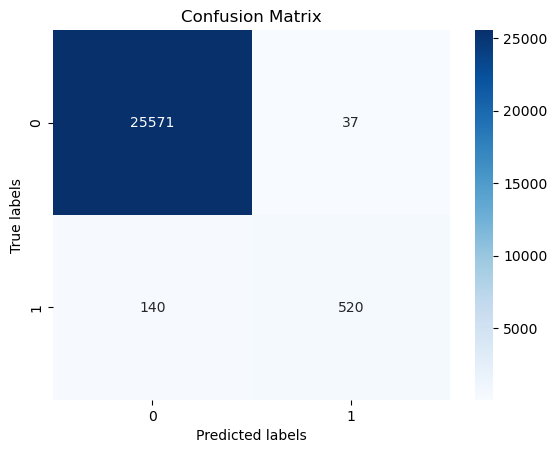

In [38]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Create heatmap plot of confusion matrix
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, cmap='Blues', fmt='g')

# Set plot labels and title
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

# Show plot
plt.show()

### Plotting the Feature Importance graph

In [39]:
feat_imp_rf_df = pd.DataFrame(
    {
        'feature': X.columns,
     'feature_importance': best_rfc.feature_importances_
     }
)

In [40]:
feat_imp_rf_df = feat_imp_rf_df.sort_values('feature_importance', ascending=False).reset_index(drop=True)

In [41]:
feat_imp_rf_df

,feature,feature_importance
0,mth_since_last_serv,0.154264
1,mil_per_sev,0.112961
2,num_serv_dealer_purchased,0.092734
3,sched_serv_warr,0.091407
4,age_of_vehicle_years,0.083723
5,total_services,0.080668
6,sched_serv_paid,0.071044
7,annualised_mileage,0.064648
8,war_utz,0.053995
9,num_dealers_visited,0.051582


In [42]:
import altair as alt

alt.Chart(feat_imp_rf_df).mark_bar().encode(
    x='feature_importance',
    y=alt.Y("feature", sort='-x'),
    tooltip=['feature','feature_importance'])

alt.Chart(...)